In [43]:
!conda list

zsh:1: command not found: conda


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
data = pd.read_csv('iris.csv', header=None)
X = data.iloc[: , :4]
y = pd.Series(map(str, data.iloc[: , 4]))

In [3]:
from sklearn import tree




In [4]:

import os

os.system('cargo rustc --release -- -C opt-level=3 -C target-cpu=native -C debuginfo=0')

 --> src/main.rs:2:5
  |
2 | use csv::Error;
  |     ^^^^^^^^^^
  |
  = note: `#[warn(unused_imports)]` on by default

 --> src/main.rs:7:17
  |
7 | use std::time::{Duration, Instant};
  |                 ^^^^^^^^

 --> src/dtree.rs:1:5
  |
1 | use std::fs::File;
  |     ^^^^^^^^^^^^^

 --> src/dtree.rs:3:5
  |
3 | use rand::prelude::*;
  |     ^^^^^^^^^^^^^^^^

 --> src/dtree.rs:4:5
  |
4 | use csv::Error;
  |     ^^^^^^^^^^

 --> src/dtree.rs:6:17
  |
6 | use std::time::{Duration, Instant};
  |                 ^^^^^^^^

 --> src/dtree.rs:7:5
  |
7 | use array_tool::vec::Uniq;
  |     ^^^^^^^^^^^^^^^^^^^^^

 --> src/dtree/utils.rs:1:5
  |
1 | use std::fs::File;
  |     ^^^^^^^^^^^^^

 --> src/dtree/utils.rs:2:5
  |
2 | use std::io::prelude::*;
  |     ^^^^^^^^^^^^^^^^^^^

 --> src/dtree/utils.rs:3:5
  |
3 | use rand::prelude::*;
  |     ^^^^^^^^^^^^^^^^

 --> src/dtree/utils.rs:4:5
  |
4 | use csv::Error;
  |     ^^^^^^^^^^

   --> src/dtree.rs:214:9
    |
214 |         (1.0 - gini)
 

0

In [13]:
'1.417358989s'.strip('ms\n')

'1.417358989'

In [5]:
import subprocess
import statistics
import warnings

warnings.filterwarnings("ignore")

# Define a list of input values
n = 5
# Initialize an empty list to store the outputs
outputs = []


ns = range(1000, 300001, 1000)

# Loop over the input values and execute the command

for row in ns:
    inner_t = []

    for i in range(n):
        # Execute the command and capture the output
        output = subprocess.check_output(
            [f'./target/release/decision-tree {row} 4'], shell=True, text=True)

        # Append the output to the list of outputs
        
        inner_t.append(float(output.strip('ms\n')))
        # outputs.append(output)

    outputs.append(np.mean(inner_t))

    # Print the outputs


   --> src/dtree.rs:196:13
    |
196 |         let now2 = Instant::now();
    |             ^^^^ help: if this is intentional, prefix it with an underscore: `_now2`

   --> src/dtree.rs:199:13
    |
199 |         let now = Instant::now();
    |             ^^^ help: if this is intentional, prefix it with an underscore: `_now`

   --> src/dtree.rs:212:13
    |
212 |         let now2 = Instant::now();
    |             ^^^^ help: if this is intentional, prefix it with an underscore: `_now2`

  --> src/random_forest.rs:18:9
   |
18 |     for i in 0..n_features {
   |         ^ help: if this is intentional, prefix it with an underscore: `_i`

  --> src/random_forest.rs:29:9
   |
29 |     for i in 0..n_samples {
   |         ^ help: if this is intentional, prefix it with an underscore: `_i`

   --> src/random_forest.rs:122:17
    |
122 |         let mut rng = rand::rngs::StdRng::seed_from_u64(self.seed);
    |                 ^^^ help: if this is intentional, prefix it with an underscore: `

In [12]:
outputs

[114.1282044,
 91.60128519999999,
 94.5648664,
 97.265382,
 100.5202142,
 103.0022876,
 105.81901459999999,
 108.18205739999999,
 114.9888076,
 114.5860072,
 120.1970538,
 118.91991620000002,
 122.5997174,
 125.062969,
 127.550552,
 131.71729639999998,
 133.2310828,
 142.0096248,
 142.40560820000002,
 145.5426714,
 150.4624076,
 151.97181940000002,
 153.3768102,
 159.518474,
 164.48734819999999,
 166.0340208,
 168.86353060000002,
 168.7435076,
 170.663317,
 177.00442500000003,
 175.43954820000002,
 178.4190382,
 184.67050139999998,
 188.89210239999997,
 191.8655436,
 199.27812820000003,
 204.57872379999998,
 200.2648528,
 203.72429860000003,
 210.0496244,
 202.802445,
 205.5958538,
 208.94677040000002,
 213.6642836,
 213.8905448,
 222.08126099999998,
 222.48235600000004,
 223.44278119999998,
 227.0345478,
 228.45476680000002,
 231.97194159999998,
 237.7465352,
 240.9115112,
 240.8380352,
 243.8690392,
 254.7165372,
 257.93805080000004,
 253.7840554,
 262.75355079999997,
 262.2530336000

In [11]:
y.iloc[:100]


0     1
1     1
2     1
3     1
4     1
     ..
95    3
96    3
97    3
98    3
99    3
Length: 100, dtype: object

In [38]:
tree_outputs = []
for row in ns:
    X_ = X.iloc[:row, :]
    y_ = y.iloc[:row]
    clf = tree.DecisionTreeClassifier(criterion='gini')
    t = %timeit -n 1 -r 5 -o clf.fit(X_, y_)
    
    tree_outputs.append(np.mean(t.all_runs)*1000)

5.88 ms ± 1.53 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
15.3 ms ± 6.21 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
The slowest run took 9.72 times longer than the fastest. This could mean that an intermediate result is being cached.
55.1 ms ± 50.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
26.8 ms ± 12.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
The slowest run took 11.05 times longer than the fastest. This could mean that an intermediate result is being cached.
80.4 ms ± 59.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
The slowest run took 6.29 times longer than the fastest. This could mean that an intermediate result is being cached.
51.1 ms ± 35.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
The slowest run took 5.59 times longer than the fastest. This could mean that an intermediate result is being cached.
53.2 ms ± 27.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
54.6 ms ± 15.3 ms per loop (mean ± std. dev.

208 ms ± 4.61 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
208 ms ± 2.71 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
209 ms ± 6.59 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
211 ms ± 5.83 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
215 ms ± 2.36 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
213 ms ± 3.59 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
231 ms ± 25 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
224 ms ± 4.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
224 ms ± 5.07 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
223 ms ± 4.25 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
230 ms ± 7.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
229 ms ± 2.28 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
242 ms ± 10.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
231 ms ± 1.64 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
242 ms ± 10.5 ms per loop (mean ± std. dev. of 5 run

455 ms ± 22.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
438 ms ± 6.01 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
440 ms ± 5.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
453 ms ± 13.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
448 ms ± 10.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
447 ms ± 4.38 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
449 ms ± 3.84 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
454 ms ± 8.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
452 ms ± 7.62 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
467 ms ± 26.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
455 ms ± 3.36 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
458 ms ± 3.15 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
461 ms ± 7.67 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
465 ms ± 3.82 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
463 ms ± 3.68 ms per loop (mean ± std. dev. of 5 r

In [39]:
outputs_ = outputs.copy()

In [40]:
for i in range(len(outputs_)):
    if outputs_[i] < 10:
        outputs_[i] = outputs_[i]*1000

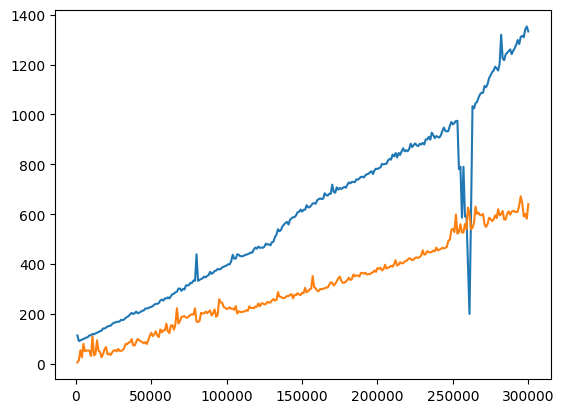

In [41]:

plt.plot(ns, outputs_, label='rust')
plt.plot(ns, tree_outputs, label='sk-learn')
